In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input/startup-growth-and-investment-data/startup_growth_investment_data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
df = pd.read_csv("startup_growth_investment_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Startup Name             5000 non-null   object 
 1   Industry                 5000 non-null   object 
 2   Funding Rounds           5000 non-null   int64  
 3   Investment Amount (USD)  5000 non-null   float64
 4   Valuation (USD)          5000 non-null   float64
 5   Number of Investors      5000 non-null   int64  
 6   Country                  5000 non-null   object 
 7   Year Founded             5000 non-null   int64  
 8   Growth Rate (%)          5000 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 351.7+ KB


In [6]:
df.describe()

,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Year Founded,Growth Rate (%)
count,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,5.491600,2.455567e+09,7.971059e+09,25.542000,2011.544000,102.091732
std,2.913353,1.423787e+09,5.479487e+09,14.271838,6.885285,56.179781
min,1.000000,1.102610e+06,1.722547e+06,1.000000,2000.000000,5.060000
25%,3.000000,1.221506e+09,3.598305e+09,13.000000,2006.000000,52.815000
50%,6.000000,2.460634e+09,7.002304e+09,25.000000,2012.000000,102.215000
75%,8.000000,3.639951e+09,1.147676e+10,38.000000,2018.000000,150.580000
max,10.000000,4.999544e+09,2.470906e+10,50.000000,2023.000000,199.970000


In [7]:
df.head()

,Startup Name,Industry,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Country,Year Founded,Growth Rate (%)
0,Startup_1,Blockchain,8,1.335166e+09,6.621448e+09,50,Germany,2012,77.10
1,Startup_2,SaaS,2,2.781498e+09,8.363214e+09,36,UK,2006,105.52
2,Startup_3,EdTech,10,3.309032e+09,1.548270e+10,39,Singapore,2016,190.47
3,Startup_4,Fintech,5,4.050196e+09,1.268253e+10,44,France,2021,9.44
4,Startup_5,EdTech,9,1.645080e+09,6.887966e+09,48,India,2011,192.00


In [8]:
#check missing values

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    plt.figure(figsize=(10, 5))
    missing_values.plot(kind='bar', color='red')
    plt.title("Number of Missing Values")
    plt.ylabel("Missing Values")
    plt.xlabel("Columns")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("There are no missing values in the dataset.")

There are no missing values in the dataset.


In [9]:
# cek duplikat
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

df = df.drop_duplicates()
print("Duplicates removed. New dataset shape:", df.shape)


Number of duplicate rows: 0
Duplicates removed. New dataset shape: (5000, 9)


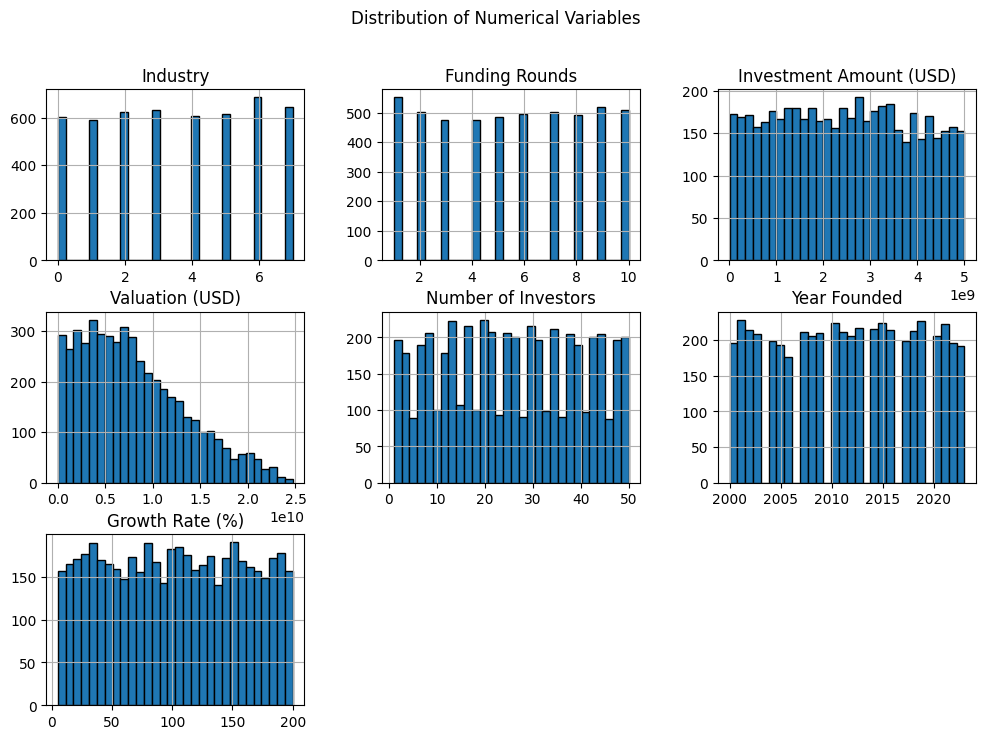

In [36]:
#EDA - plot historik data numerik 
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Variables")
plt.show()

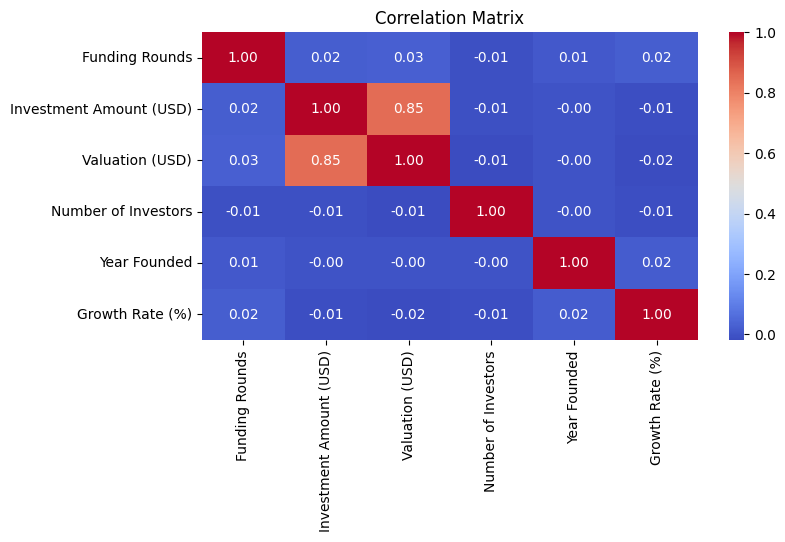

In [11]:
#correlation matrix

plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Text(0.5, 1.0, 'Funding Rounds vs Startup Valuation')

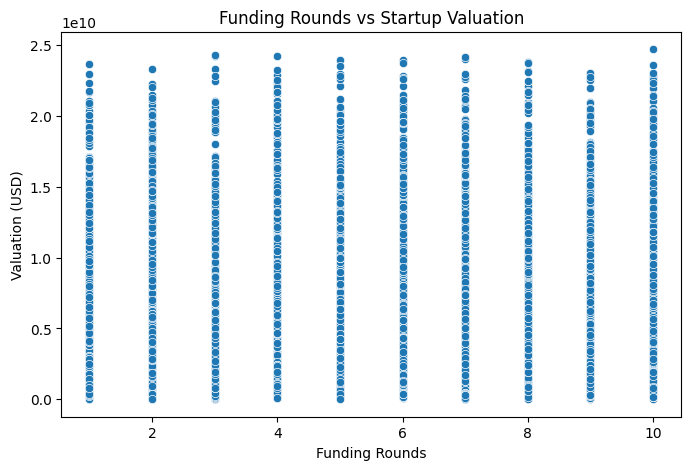

In [34]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Funding Rounds"], y=df["Valuation (USD)"])
plt.title("Funding Rounds vs Startup Valuation")

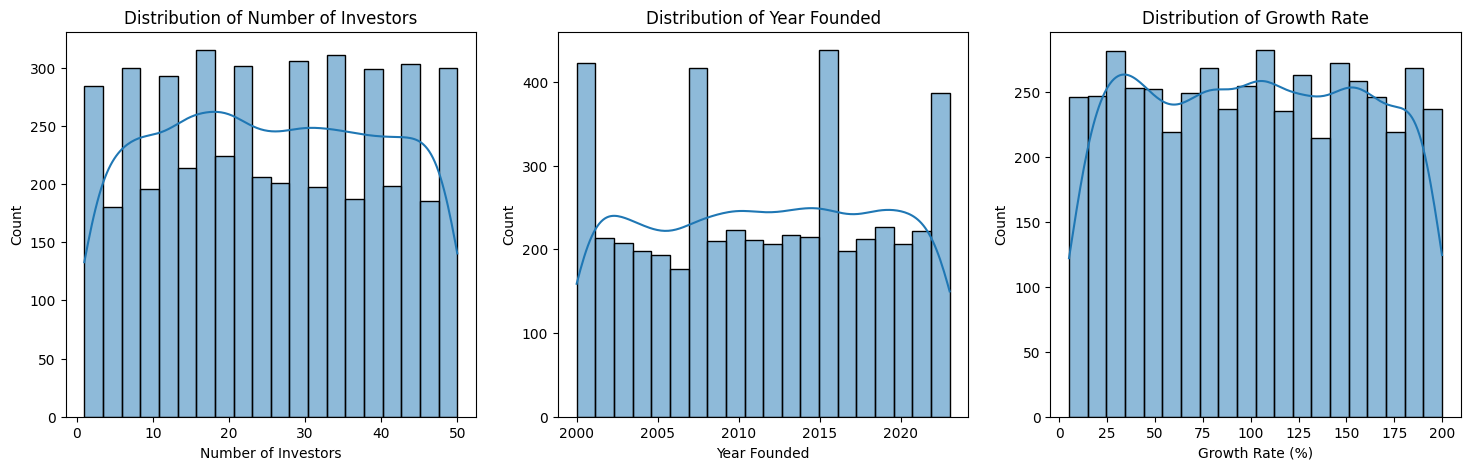

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["Number of Investors"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Number of Investors")

sns.histplot(df["Year Founded"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Year Founded")

sns.histplot(df["Growth Rate (%)"], bins=20, kde=True, ax=axes[2])
axes[2].set_title("Distribution of Growth Rate")

plt.show()


In [12]:
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ML Modelleri
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [13]:
#clean data selain numerik kecuali target
df = df.drop(columns=['Startup Name', 'Country'])

In [14]:
#encode variabel kategorikal 
le = LabelEncoder()
df['Industry'] = le.fit_transform(df['Industry'])


In [15]:
#definisikan xy
X = df.drop(columns=['Growth Rate (%)'])
y = df['Growth Rate (%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=537)

In [16]:
#standarisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
#opsi model algoritma
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, min_samples_split=4, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_split=5, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=10, weights="distance", metric="minkowski"),
    "SVR": SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale'),
    "Neural Network (MLP)": MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)
}

In [18]:
#training model
results = []

for name, model in models.items():
    print(f"Training {name}...")

    # Training
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Prediction
    start_time = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start_time

    # Performance Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append([name, mae, mse, r2, train_time, predict_time])

    results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "R² Score", "Training Time (sec)", "Prediction Time (sec)"])
    results_df



Training Linear Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Training KNN...
Training SVR...
Training Neural Network (MLP)...


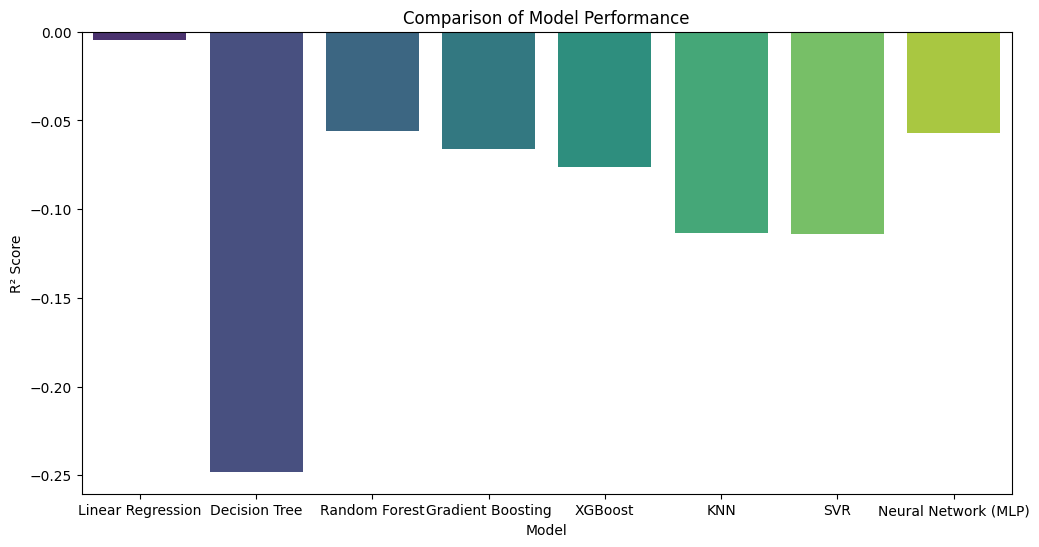

In [33]:
#EDA
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Sesuaikan ukuran sesuai kebutuhan
sns.barplot(data=results_df, x="Model", y="R² Score", hue="Model", palette="viridis", legend=False)
plt.title("Comparison of Model Performance")
plt.xlabel("Model")
plt.ylabel("R² Score")

plt.show()


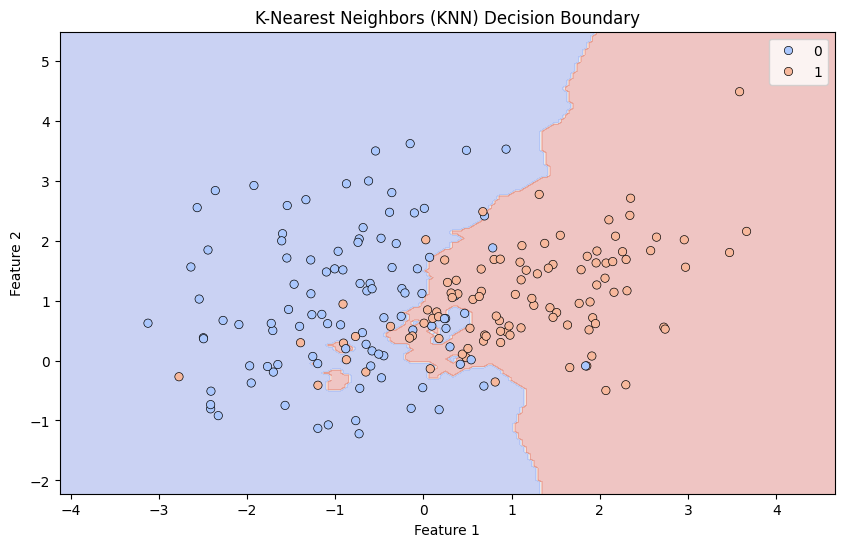

In [20]:
# coba pakai KNN
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", edgecolor="black")
plt.title("K-Nearest Neighbors (KNN) Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [22]:
#analisis startup valuation dengan liniar regresion

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
features = ["Funding Rounds", "Number of Investors", "Investment Amount (USD)", "Industry"]
target = "Valuation (USD)"

# Pisahkan data numerik & kategori
df_numeric = df[["Funding Rounds", "Number of Investors", "Investment Amount (USD)"]]
df_categorical = df[["Industry"]]

In [24]:
# One-hot encoding untuk Industry
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_categorical = encoder.fit_transform(df_categorical)
encoded_feature_names = encoder.get_feature_names_out(["Industry"])

# Gabungkan fitur numerik & kategori yang sudah diencoding
X = np.hstack((df_numeric.values, encoded_categorical))
feature_names = list(df_numeric.columns) + list(encoded_feature_names)
y = df[target].values

In [25]:
# Normalisasi data numerik
scaler = StandardScaler()
X[:, :3] = scaler.fit_transform(X[:, :3])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Buat dan latih model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [27]:
# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Tampilkan hasil
evaluation_results = {"MAE": mae, "RMSE": rmse, "R² Score": r2}
print(evaluation_results)

{'MAE': 2181459739.3621645, 'RMSE': 2907083794.1788945, 'R² Score': 0.7079025442834794}


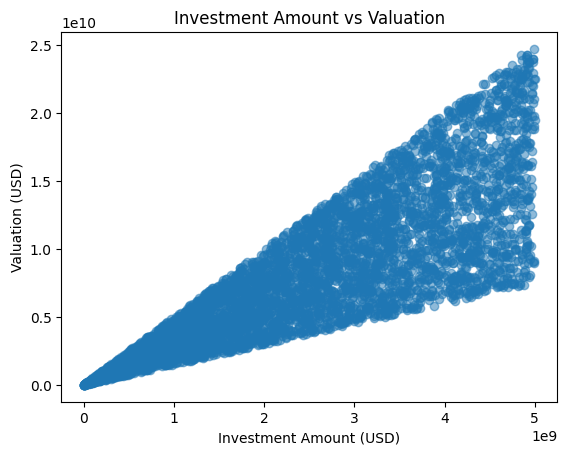

In [41]:
plt.scatter(df["Investment Amount (USD)"], df[target], alpha=0.5)
plt.xlabel("Investment Amount (USD)")
plt.ylabel("Valuation (USD)")
plt.title("Investment Amount vs Valuation")
plt.show()